In [3]:
# 1.1)
import os
import pickle
import datetime
from collections import defaultdict

# 1.2)
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import sklearn as skl
import pandas as pd
#import dill
import json

# 1.3)
import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device') 

Using cpu device


In [4]:

# Ruta al archivo donde se guardaron los resultados
filename1 = 'linealn256p02.pth'
filename2 = 'linealn128p02.pth'
filename3 = 'linealn64p02.pth'
filename4 = 'linealn256p01.pth'
filename5 = 'linealn256p01lr1e-2.pth'
filename6 = 'linealn256p01bs200.pth'
filename7 = 'linealn256p01bs50.pth'
filename8 = 'linealn256p01SGD.pth'
filename9 = 'conv2.pth'

carpeta_modelos = '/Users/augusto/Library/Mobile Documents/com~apple~CloudDocs/Augusto/Facu/En Curso/Redes Neuronales/Trabajo Final/Modelos'

filepath1 = os.path.join(carpeta_modelos, filename1)
filepath2 = os.path.join(carpeta_modelos, filename2)
filepath3 = os.path.join(carpeta_modelos, filename3)
filepath4 = os.path.join(carpeta_modelos, filename4)
filepath5 = os.path.join(carpeta_modelos, filename5)
filepath6 = os.path.join(carpeta_modelos, filename6)
filepath7 = os.path.join(carpeta_modelos, filename7)
filepath8 = os.path.join(carpeta_modelos, filename8)
filepath9 = os.path.join(carpeta_modelos, filename9)


# Cargar los resultados
results1 = torch.load(filepath1)
results2 = torch.load(filepath2)
results3 = torch.load(filepath3)
results4 = torch.load(filepath4)
results5 = torch.load(filepath5)
results6 = torch.load(filepath6)
results7 = torch.load(filepath7)
results8 = torch.load(filepath8)
results_conv2 = torch.load(filepath9)

# Extraer las pérdidas de entrenamiento y validación
list_avg_train_loss_incorrecta_1 = results1['ECM incorrectos sobre conjunto de validación']
list_avg_train_loss_1 = results1['ECM sobre conjunto de entrenamiento n=256 p=0.2']
list_avg_valid_loss_1 = results1['ECM sobre conjunto de validación n=256 p=0.2']

list_avg_train_loss_incorrecta_2 = results2['ECM incorrectos sobre conjunto de validación']
list_avg_train_loss_2 = results2['ECM sobre conjunto de entrenamiento n=128 p=0.2']
list_avg_valid_loss_2 = results2['ECM sobre conjunto de validación n=128 p=0.2']

list_avg_train_loss_incorrecta_3 = results3['ECM incorrectos sobre conjunto de validación']
list_avg_train_loss_3 = results3['ECM sobre conjunto de entrenamiento n=64 p=0.2']
list_avg_valid_loss_3 = results3['ECM sobre conjunto de validación n=64 p=0.2']

list_avg_train_loss_incorrecta_4 = results4['ECM incorrectos sobre conjunto de validación']
list_avg_train_loss_4 = results4['ECM sobre conjunto de entrenamiento n=256 p=0.1']
list_avg_valid_loss_4 = results4['ECM sobre conjunto de validación n=256 p=0.1']

list_avg_train_loss_incorrecta_5 = results5['ECM incorrectos sobre conjunto de validación']
list_avg_train_loss_5 = results5['ECM sobre conjunto de entrenamiento n=256 p=0.1 lr=1e-2']
list_avg_valid_loss_5 = results5['ECM sobre conjunto de validación n=256 p=0.1 lr=1e-2']

list_avg_train_loss_incorrecta_6 = results6['ECM incorrectos sobre conjunto de validación']
list_avg_train_loss_6 = results6['ECM sobre conjunto de entrenamiento n=256 p=0.1 bs=200']
list_avg_valid_loss_6 = results6['ECM sobre conjunto de validación n=256 p=0.1 bs=200']

list_avg_train_loss_incorrecta_7 = results7['ECM incorrectos sobre conjunto de validación']
list_avg_train_loss_7 = results7['ECM sobre conjunto de entrenamiento n=256 p=0.1 bs=50']
list_avg_valid_loss_7 = results7['ECM sobre conjunto de validación n=256 p=0.1 bs=50']

list_avg_train_loss_incorrecta_8 = results8['ECM incorrectos sobre conjunto de validación']
list_avg_train_loss_8 = results8['ECM sobre conjunto de entrenamiento n=256 p=0.1 SGD']
list_avg_valid_loss_8 = results8['ECM sobre conjunto de validación n=256 p=0.1 SGD']

list_avg_train_loss_incorrecta_9 = results_conv2['ECM incorrectos sobre conjunto de validación']
list_avg_train_loss_9 = results_conv2['ECM sobre conjunto de entrenamiento conv2']
list_avg_valid_loss_9 = results_conv2['ECM sobre conjunto de validación con2']

/var/folders/5x/0rbxqr2n52j7rmrg51hjzhy80000gn/T/ipykernel_38837/598478958.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results1 = torch.load(filepath1)
/var/folders

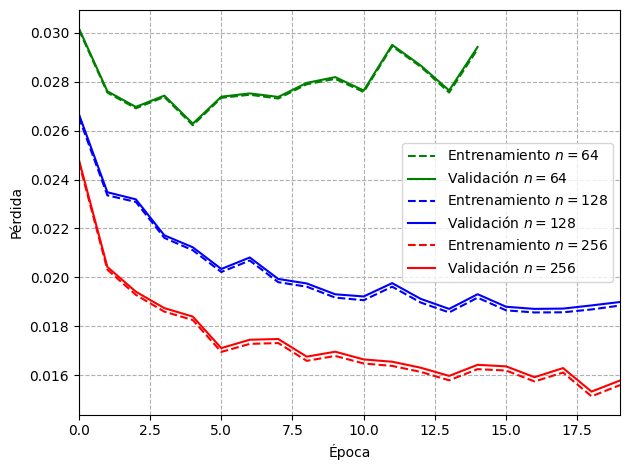

In [5]:
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.xlim(0,19)


plt.plot(list_avg_train_loss_3, label="Entrenamiento $n = 64$", linestyle='--', color='green')
plt.plot(list_avg_valid_loss_3, label="Validación $n = 64$", color='green')

plt.plot(list_avg_train_loss_2, label="Entrenamiento $n = 128$", linestyle='--', color='blue')
plt.plot(list_avg_valid_loss_2, label="Validación $n = 128$", color='blue')

plt.plot(list_avg_train_loss_1, label="Entrenamiento $n = 256$", linestyle='--', color='red')
plt.plot(list_avg_valid_loss_1, label="Validación $n = 256$", color='red')

plt.grid(True, linestyle='--')  # Agregar una grilla para mejor legibilidad
plt.legend(loc='best')  # Ajustar la ubicación de la leyenda si es necesario

plt.tight_layout()  # Ajustar el espaciado del gráfico
#plt.savefig('Variando capa lineal.png', dpi = 500)  # Guardar el gráfico como una imagen
plt.show()

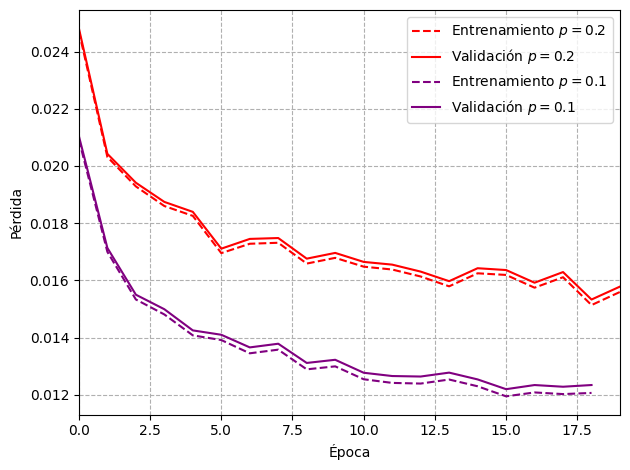

In [6]:
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.xlim(0,19)

plt.plot(list_avg_train_loss_1, label="Entrenamiento $p = 0.2$", linestyle='--', color='red')
plt.plot(list_avg_valid_loss_1, label="Validación $p = 0.2$", color='red')

plt.plot(list_avg_train_loss_4, label="Entrenamiento $p = 0.1$", linestyle='--', color='purple')
plt.plot(list_avg_valid_loss_4, label="Validación $p = 0.1$", color='purple')

plt.grid(True, linestyle='--')
plt.legend(loc='best')

plt.tight_layout()
#plt.savefig('Variando probabilidad de dropout.png', dpi = 500)
plt.show()

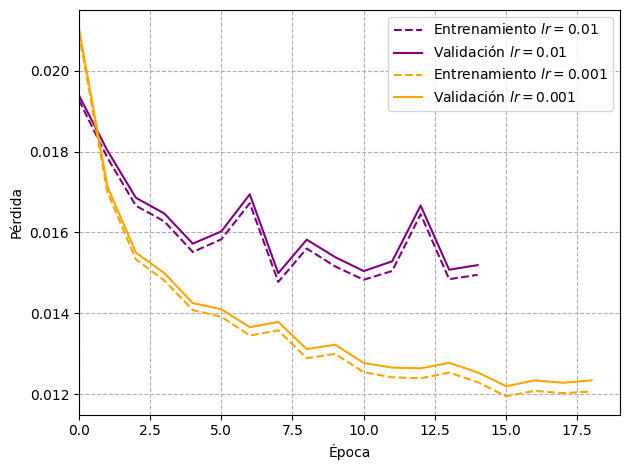

In [7]:
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.xlim(0,19)

plt.plot(list_avg_train_loss_5, label="Entrenamiento $lr=0.01$", linestyle='--', color='purple')
plt.plot(list_avg_valid_loss_5, label="Validación $lr=0.01$", color='purple')

plt.plot(list_avg_train_loss_4, label="Entrenamiento $lr=0.001$", linestyle='--', color='orange')
plt.plot(list_avg_valid_loss_4, label="Validación $lr=0.001$", color='orange')

plt.grid(True, linestyle='--')
plt.legend(loc='best')

plt.tight_layout()
#plt.savefig('Variando learning rate.png', dpi = 500)
plt.show()

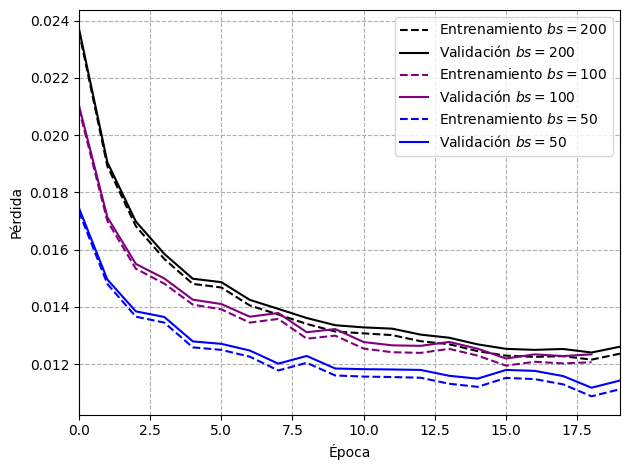

In [8]:
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.xlim(0,19)

plt.plot(list_avg_train_loss_6, label="Entrenamiento $bs=200$", linestyle='--', color='black')
plt.plot(list_avg_valid_loss_6, label="Validación $bs=200$", color='black')

plt.plot(list_avg_train_loss_4, label="Entrenamiento $bs=100$", linestyle='--', color='purple')
plt.plot(list_avg_valid_loss_4, label="Validación $bs=100$", color='purple')

plt.plot(list_avg_train_loss_7, label="Entrenamiento $bs=50$", linestyle='--', color='blue')
plt.plot(list_avg_valid_loss_7, label="Validación $bs=50$", color='blue')

plt.grid(True, linestyle='--')
plt.legend(loc='best')

plt.tight_layout()
#plt.savefig('Variando batch size.png', dpi = 500)
plt.show()

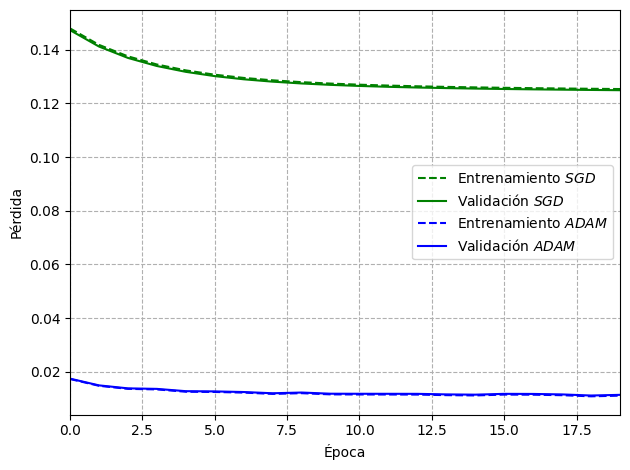

In [9]:
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.xlim(0,19)

plt.plot(list_avg_train_loss_8, label="Entrenamiento $SGD$", linestyle='--', color='green')
plt.plot(list_avg_valid_loss_8, label="Validación $SGD$", color='green')

plt.plot(list_avg_train_loss_7, label="Entrenamiento $ADAM$", linestyle='--', color='blue')
plt.plot(list_avg_valid_loss_7, label="Validación $ADAM$", color='blue')


plt.grid(True, linestyle='--')
plt.legend(loc='best')

plt.tight_layout()
#plt.savefig('Variando optimizador.png', dpi = 500)
plt.show()

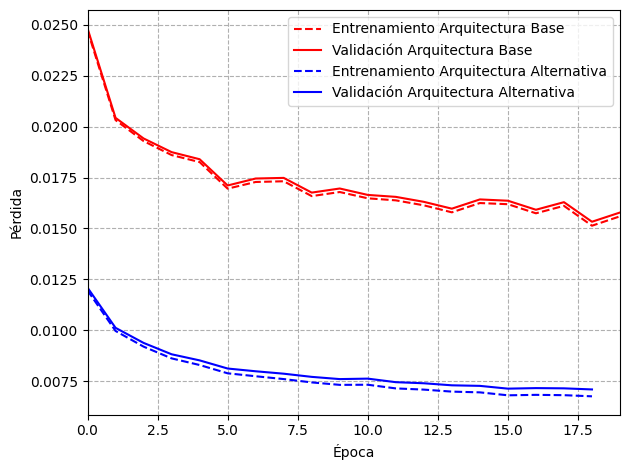

In [10]:
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.xlim(0,19)


plt.plot(list_avg_train_loss_1, label="Entrenamiento Arquitectura Base", linestyle='--', color='red')
plt.plot(list_avg_valid_loss_1, label="Validación Arquitectura Base", color='red')

plt.plot(list_avg_train_loss_9, label="Entrenamiento Arquitectura Alternativa", linestyle='--', color='blue')
plt.plot(list_avg_valid_loss_9, label="Validación Arquitectura Alternativa", color='blue')


plt.grid(True, linestyle='--')
plt.legend(loc='best')

plt.tight_layout()
#plt.savefig('Variando arquitectura.png',dpi = 500)
plt.show()

In [11]:
import pickle
# Para ver qué hay en cada índice
# results1 = [[train_avg_loss_incorrecta_1],[train_avg_loss_1],[valid_avg_loss_1],[train_precision_incorrecta_1],[train_precision_1],[valid_precision_1]]
# results2 = [[train_avg_loss_incorrecta_2],[train_avg_loss_2],[valid_avg_loss_2],[train_precision_incorrecta_2],[train_precision_2],[valid_precision_2]]
# results3 = [[train_avg_loss_incorrecta_3],[train_avg_loss_3],[valid_avg_loss_3],[train_precision_incorrecta_3],[train_precision_3],[valid_precision_3]]


with open('/Users/augusto/Library/Mobile Documents/com~apple~CloudDocs/Augusto/Facu/En Curso/Redes Neuronales/Trabajo Final/Modelos/clasif_results1.pkl','rb') as f:
     clasif_results1 = pickle.load(f)

with open('/Users/augusto/Library/Mobile Documents/com~apple~CloudDocs/Augusto/Facu/En Curso/Redes Neuronales/Trabajo Final/Modelos/clasif_results2.pkl','rb') as f:
    clasif_results2 = pickle.load(f)

with open('/Users/augusto/Library/Mobile Documents/com~apple~CloudDocs/Augusto/Facu/En Curso/Redes Neuronales/Trabajo Final/Modelos/clasif_results3.pkl','rb') as f:
    clasif_results3 = pickle.load(f)


with open('/Users/augusto/Library/Mobile Documents/com~apple~CloudDocs/Augusto/Facu/En Curso/Redes Neuronales/Trabajo Final/Modelos/clasif_results4.pkl','rb') as f:
    clasif_results4 = pickle.load(f)


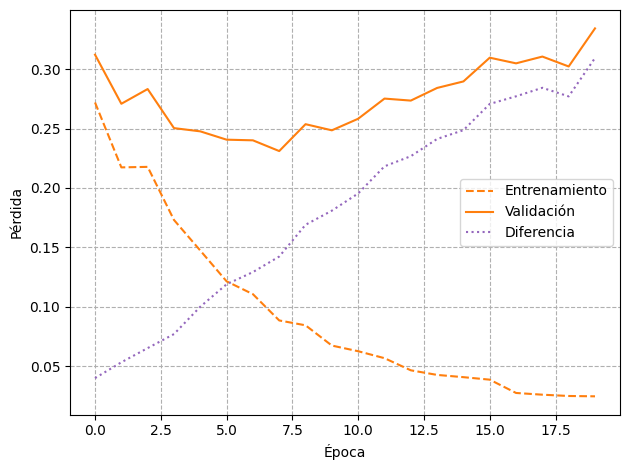

In [12]:
lista1 = clasif_results1[2][0]
lista2 = clasif_results1[1][0]
resultado = [a - b for a,b  in zip(lista1, lista2)]
plt.xlabel("Época")
plt.ylabel("Pérdida")

plt.plot(clasif_results1[1][0], label="Entrenamiento", linestyle='--', color='C1')
plt.plot(clasif_results1[2][0], label="Validación", color='tab:orange') 
plt.plot(resultado, label="Diferencia", color='tab:purple', linestyle='dotted')

plt.grid(True, linestyle='--')
plt.legend(loc='best')
#plt.title('Entrenando Encoder y Clasificador, a partir de encoder sin entrenar')
plt.tight_layout()
#plt.savefig('EyC, E sin entrenar', dpi=500)
plt.show()

[0.025677533559501198, 0.03073553529878459, 0.033736201313634695, 0.030340917476763374, 0.03727571819598474, 0.034191502779722216, 0.03243139720211424, 0.03355533175791303, 0.034222986493259666, 0.03352465581148861, 0.035172097850590944, 0.035567541314909856, 0.03251662753522394, 0.03412770423417294, 0.03400769318764407, 0.03371585169186192, 0.03643003457536298, 0.0361845728196204, 0.03303036743775012, 0.035371507952610626]


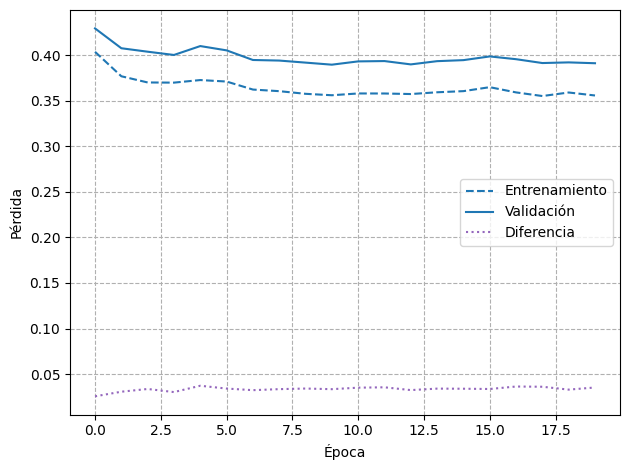

In [13]:
lista1 = clasif_results2[2][0]
lista2 = clasif_results2[1][0]

resultado = [a - b for a, b in zip(lista1, lista2)]
print(resultado)

plt.xlabel("Época")
plt.ylabel("Pérdida")

plt.plot(clasif_results2[1][0], label="Entrenamiento",linestyle='--', color='tab:blue')
plt.plot(clasif_results2[2][0], label="Validación", color='tab:blue')
plt.plot(resultado, label="Diferencia", color='tab:purple', linestyle='dotted')
#plt.title('Entrenamiento Clasificador, a partir de encoder entrenado')
plt.grid(True, linestyle='--')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('C, E entrenado', dpi=500)
plt.show()

[0.038141196854412585, 0.05221212397019068, 0.06397815243341029, 0.0840216371541222, 0.09691331451913962, 0.10698443030472844, 0.12702573931310326, 0.13636839934935174, 0.16387361792963928, 0.16593336420017296, 0.19577541375183502, 0.21095075974822974, 0.22589692802934833, 0.2446209034863083, 0.24715450018741345, 0.2624152136852111, 0.2752830650465815, 0.30393791684298777, 0.3180640888509515, 0.29973458319591983]


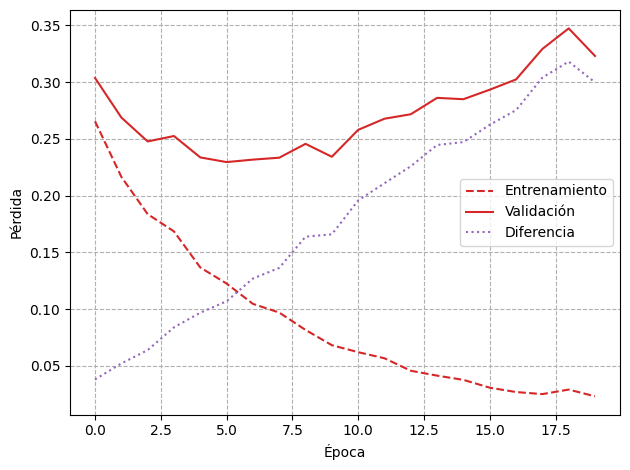

In [14]:
lista1 = clasif_results3[2][0]
lista2 = clasif_results3[1][0]

resultado = [a - b for a, b in zip(lista1, lista2)]
print(resultado)  # Salida: [9, 15, 20, 25]

plt.xlabel("Época")
plt.ylabel("Pérdida")


plt.plot(clasif_results3[1][0], label="Entrenamiento", linestyle='--', color = 'tab:red')
plt.plot(clasif_results3[2][0], label="Validación", color = 'tab:red')
plt.plot(resultado, label="Diferencia", color='tab:purple', linestyle='dotted')
#plt.title('Entrenamiento Encoder y Clasificador, a partir de encoder entrenado')
plt.grid(True, linestyle='--')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('EyC, E entrenado', dpi=500)

[0.027976327439149185, 0.030033182501792877, 0.030288392516473917, 0.033648464952905965, 0.03462685678154226, 0.0343775075860322, 0.033920615197469806, 0.034529262079546874, 0.035171465178330696, 0.032989590174208105, 0.03443119021753471, 0.0337182749807835, 0.03399621677895387, 0.03245031066238879, 0.035268580801784966, 0.03485209468752143, 0.03435378286366664, 0.03661089329048994, 0.03606798915813364, 0.03182727952798209]


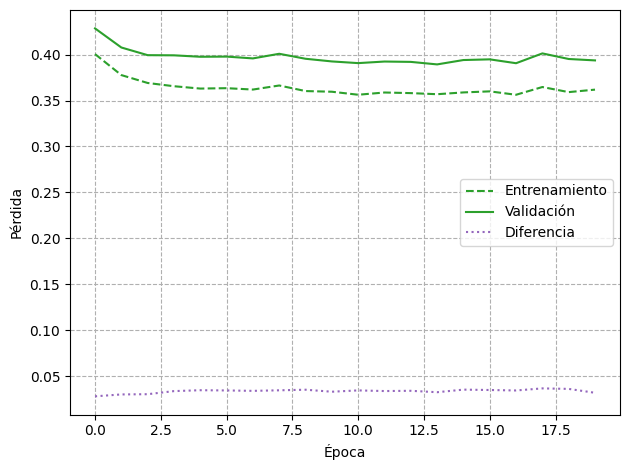

In [15]:
lista1 = clasif_results4[2][0]
lista2 = clasif_results4[1][0]

resultado = [a - b for a, b in zip(lista1, lista2)]
print(resultado)  # Salida: [9, 15, 20, 25]

plt.xlabel("Época")
plt.ylabel("Pérdida")

plt.plot(clasif_results4[1][0], label="Entrenamiento", linestyle='--', color = 'tab:green')
plt.plot(clasif_results4[2][0], label="Validación", color = 'tab:green')
#plt.title('Entrenamiento Clasificador, a partir de encoder sin entrenar')
plt.plot(resultado, label="Diferencia", color='tab:purple', linestyle='dotted')
plt.grid(True, linestyle='--')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('C, E sin entrenar', dpi=500)

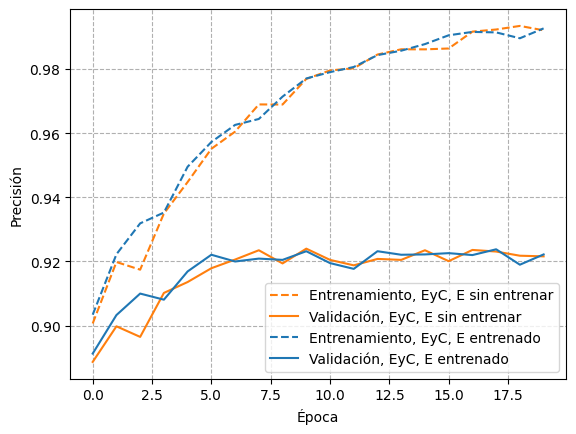

In [16]:
# Para ver qué hay en cada índice
# results1 = [[train_avg_loss_incorrecta_1],[train_avg_loss_1],[valid_avg_loss_1],[train_precision_incorrecta_1],[train_precision_1],[valid_precision_1]]
# results2 = [[train_avg_loss_incorrecta_2],[train_avg_loss_2],[valid_avg_loss_2],[train_precision_incorrecta_2],[train_precision_2],[valid_precision_2]]
# results3 = [[train_avg_loss_incorrecta_3],[train_avg_loss_3],[valid_avg_loss_3],[train_precision_incorrecta_3],[train_precision_3],[valid_precision_3]]

plt.xlabel("Época")
plt.ylabel("Precisión")

plt.plot(clasif_results1[4][0], label="Entrenamiento, EyC, E sin entrenar", color='tab:orange', linestyle='--')
plt.plot(clasif_results1[5][0], label="Validación, EyC, E sin entrenar", color='tab:orange')
plt.plot(clasif_results3[4][0], label="Entrenamiento, EyC, E entrenado", color='tab:blue', linestyle='--')
plt.plot(clasif_results3[5][0], label="Validación, EyC, E entrenado", color='tab:blue')

plt.legend(loc='best')
plt.grid(True, linestyle='--')
plt.savefig('/Users/augusto/Library/Mobile Documents/com~apple~CloudDocs/Augusto/Facu/En Curso/Redes Neuronales/Trabajo Final/Gráficos/Precisión EyC', dpi = 500)
plt.show()

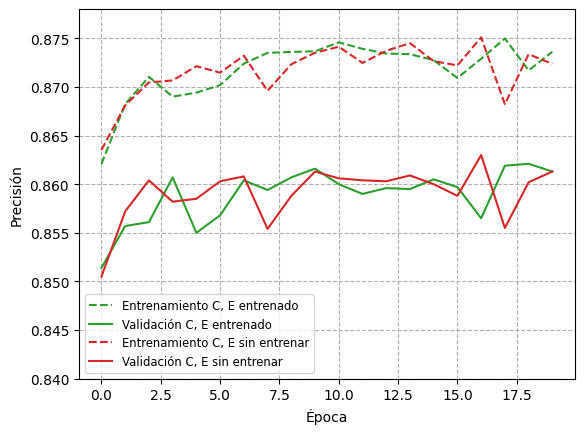

In [26]:
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.ylim(0.84,0.878)

plt.plot(clasif_results2[4][0], label="Entrenamiento C, E entrenado", color='tab:green', linestyle='--')
plt.plot(clasif_results2[5][0], label="Validación C, E entrenado", color='tab:green')

plt.plot(clasif_results4[4][0], label="Entrenamiento C, E sin entrenar", color='tab:red', linestyle='--')
plt.plot(clasif_results4[5][0], label="Validación C, E sin entrenar", color='tab:red')


plt.legend(loc='best', fontsize='small')
plt.grid(True, linestyle='--')
plt.savefig('/Users/augusto/Library/Mobile Documents/com~apple~CloudDocs/Augusto/Facu/En Curso/Redes Neuronales/Trabajo Final/Gráficos/Precisión C', dpi = 500)
plt.show()